# Plot Livox output

First you livox_openpylivox_controller_demo_prof_jason.py, which is my slightly modified version of
https://github.com/ryan-brazeal-ufl/OpenPyLivox/blob/master/livox_controller_demo.py

It saves two .bin files (lidar and IMU data) and then converts to two .csv files.

We open these CSV files here and analyze them.

The shelf data that I took is at:

https://drive.google.com/file/d/1a80Nhu6pZzL5L_WhIZvgUbxHm2VJ5T1J/view?usp=drive_link

In [1]:
%matplotlib inline
from pylab import *

In [2]:
import pandas  # used to read CSVs and include the column names

In [3]:
# Load IMU CSV file with comment the top which describes the data
#imu = pandas.read_csv('test_IMU.bin.csv', delimiter=',')  # fixed filename.

# To be sure we're loading an IMU file that corresponds with the same lidar file, make a variable:
# pick one of these as the base name. We'll add _IMU or not and the extension
run_name = 'shelves_stationary'
#run_name = 'shelves_twisting_left_right'

imu = pandas.read_csv(run_name+'_IMU.bin.csv', delimiter=',')
imu.columns = [s.replace('//','') for s in imu.columns]  # Remove the comment characters
imu.columns

Index(['gyro_x', 'gyro_y', 'gyro_z', 'acc_x', 'acc_y', 'acc_z', 'time'], dtype='object')

In [4]:
# Load lidar CSV file with comment the top which describes the data
#lidar = pandas.read_csv('test.bin.csv', delimiter=',')
lidar = pandas.read_csv(run_name+'.bin.csv', delimiter=',')
lidar.columns = [s.replace('//','') for s in lidar.columns]  # Remove the comment characters
lidar.columns

Index(['X', 'Y', 'Z', 'Inten-sity', 'Time', 'ReturnNum', 'ReturnType', 'sConf',
       'iConf'],
      dtype='object')

Mean sample rate: 204.6078488639049 Hz


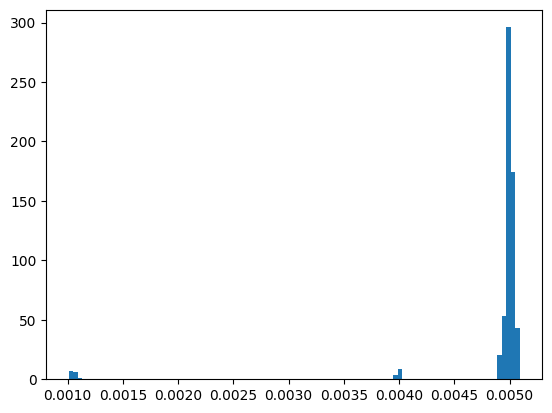

In [5]:
# Check that the IMU times are spaced by 5ms, corresponding to a 200Hz sampling rate
hist(np.diff(imu.time),bins=100)
print('Mean sample rate:', 1/np.mean(np.diff(imu.time)), 'Hz')

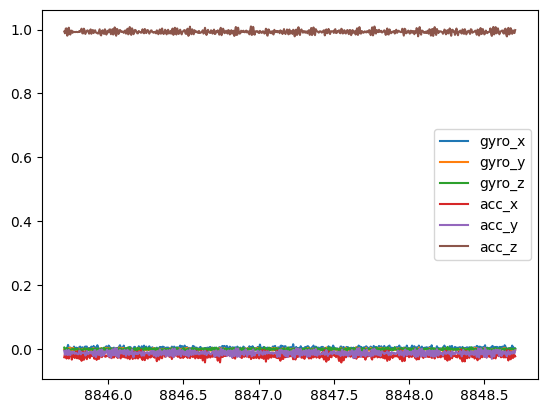

In [6]:
# Plot the IMU data. If it doesn't move, everything should be 0 except for the acc_z = 1g
for name in ['gyro_x', 'gyro_y', 'gyro_z', 'acc_x', 'acc_y', 'acc_z']:  # everything except 'time'
    plot(imu.time, imu[name], label=name)
legend()

Median time between lidar samples: 0.0 sec


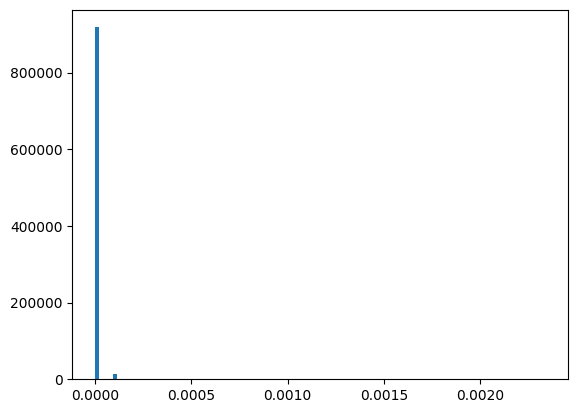

In [7]:
# Check that the lidar returns times are quick.
hist(np.diff(lidar.Time),bins=100)
print('Median time between lidar samples:', np.median(np.diff(lidar.Time)), 'sec')
print('I think that we need to interpolate because this time stamp jumps.')

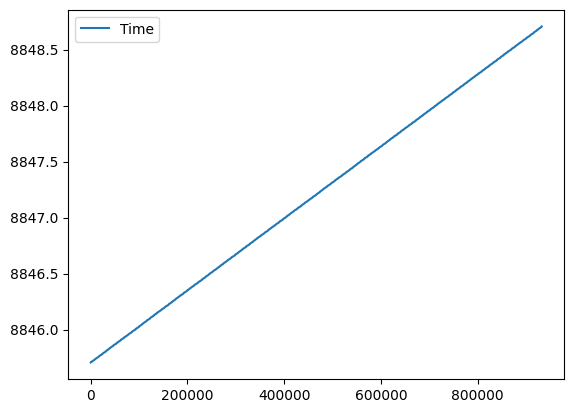

In [8]:
# Plot the lidar time
plot(lidar.Time, label='Time')
legend()

/home/jason/stuff/mudd/clinic/sokil2024-2025/livox/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/jason/stuff/mudd/clinic/sokil2024-2025/livox/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


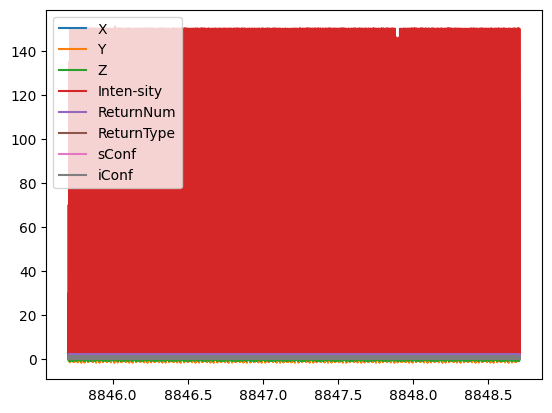

In [9]:
# Plot lidar data over time
for name in ['X', 'Y', 'Z', 'Inten-sity', 'ReturnNum', 'ReturnType', 'sConf', 'iConf']:  # everything except 'Time'
    plot(lidar.Time, lidar[name], label=name)
legend()

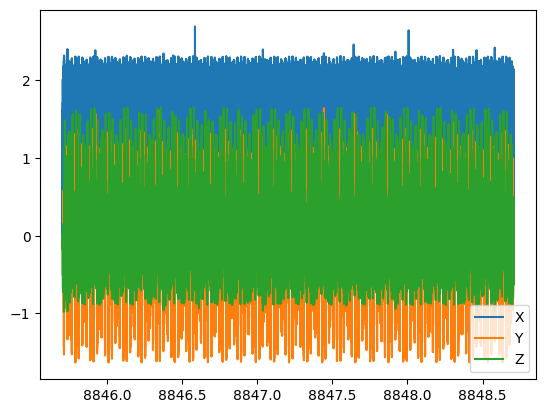

In [10]:
for name in ['X', 'Y', 'Z']:
    plot(lidar.Time, lidar[name], label=name)
legend()

Text(0.5, 1.0, 'color is intensity')

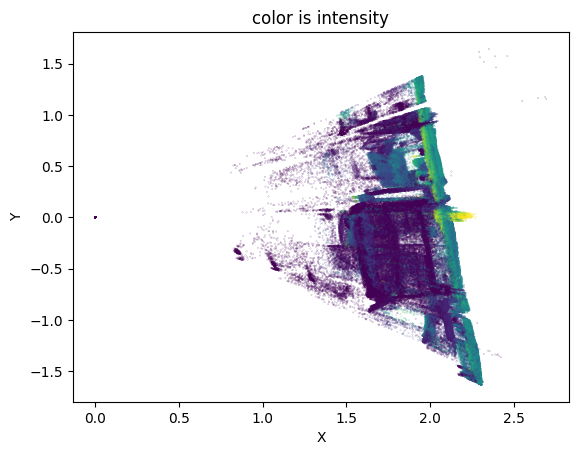

In [11]:
colors = lidar['Inten-sity']
plt.scatter(lidar.X, lidar.Y, c=colors, cmap='viridis', s=0.01)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('color is intensity')

Text(0.5, 1.0, 'color is instensity')

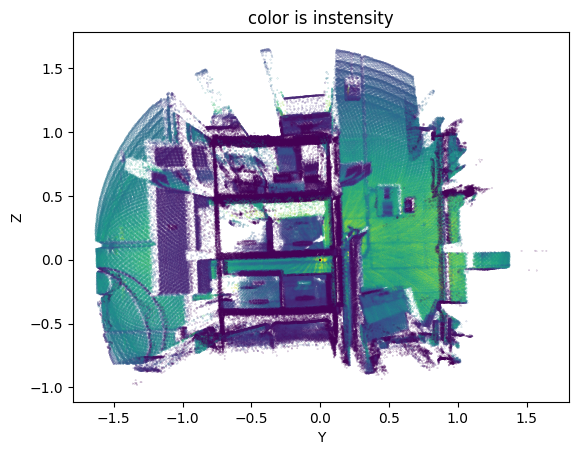

In [12]:
colors = lidar['Inten-sity']
plt.scatter(lidar.Y, lidar.Z, c=colors, cmap='viridis', s=0.01)
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('color is instensity')

Text(0.5, 1.0, 'color is distance (X)')

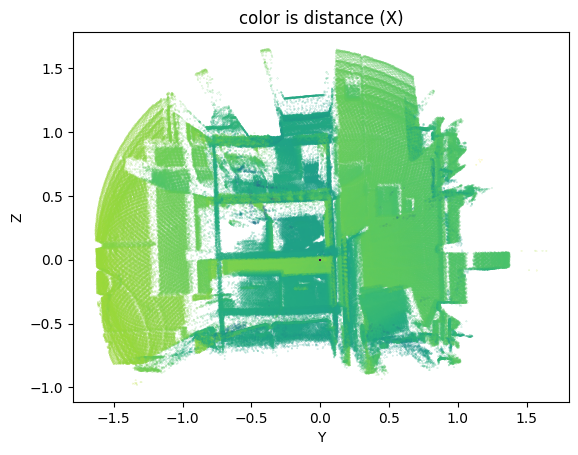

In [13]:
colors = lidar['X']
plt.scatter(lidar.Y, lidar.Z, c=colors, cmap='viridis', s=0.01)
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('color is distance (X)')

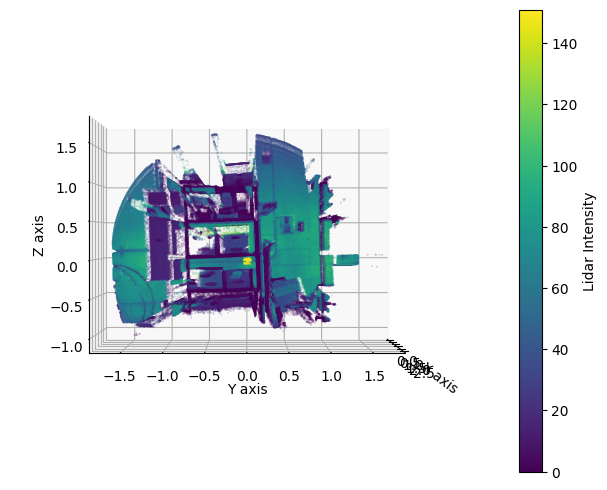

In [14]:

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

# Create 3D scatter plot
colors = lidar['Inten-sity']
sc = ax.scatter(lidar.X, lidar.Y, lidar.Z, c=colors, cmap='viridis', s=0.01)

# Set viewpoint to look along the z-axis (I think)
#ax.view_init(elev=90, azim=-90)

# Set viewpoint to look along the y-axis (I think)
#ax.view_init(elev=0, azim=90)

# Set viewpoint to look along the x-axis (I think)
ax.view_init(elev=0, azim=0)

# Add a color bar
cb = plt.colorbar(sc)
cb.set_label('Lidar Intensity')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()